In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW

In [283]:
inf_2014 = 1.174
inf_2015 = 1.173
inf_2016 = 1.158
inf_2017 = 1.134
inf_2018 = 1.107
inf_2019 = 1.087
inf_2020 = 1.074

In [284]:
df = pd.read_csv('Deck-Data.csv', header = 0)

In [285]:
inf_costs = []
for i, row in df.iterrows():
    cost = row['Cost']
    if row['Year'] == 2014:
        inf_costs.append(cost * inf_2014)
    elif row['Year'] == 2015:
        inf_costs.append(cost * inf_2015)
    elif row['Year'] == 2016:
        inf_costs.append(cost * inf_2016)   
    elif row['Year'] == 2015:
        inf_costs.append(cost * inf_2017)
    elif row['Year'] == 2015:
        inf_costs.append(cost * inf_2018)
    elif row['Year'] == 2015:
        inf_costs.append(cost * inf_2019)        
    elif row['Year'] == 2015:
        inf_costs.append(cost * inf_2020)
    else:
        inf_costs.append(cost)



In [286]:
df['2021 Cost'] = inf_costs
no_yorion = df[df['Yorion'] == 'n']
no_yorion

,Deck Name,Year,Count,Meta Share,Cost,Colors,Yorion,2021 Cost
0,Melira Pod,2014,40,10.15,1072.29,wbg,n,1258.86846
1,The Rock,2014,33,8.38,2068.59,wbg,n,2428.52466
2,Affinity,2014,31,7.87,596.70,wubrg,n,700.52580
3,Splinter Twin,2014,26,6.60,1219.45,ur,n,1431.63430
4,Mono Red Burn,2014,24,6.09,123.08,r,n,144.49592
...,...,...,...,...,...,...,...,...
794,Faeries,2021,1,0.20,1385.00,wub,n,1385.00000
795,8-Rack,2021,1,0.20,596.00,b,n,596.00000
796,Glimpse Combo,2021,1,0.20,906.00,wurg,n,906.00000
797,Asmo Food,2021,1,0.20,746.00,wbg,n,746.00000


# All Decks, With and Without Yoirion

In [287]:
# Without Yorion
weighted_means = []
weighted_std = []
std_err = []
for year in df['Year'].unique():
    weighted_stats = DescrStatsW(no_yorion[no_yorion['Year'] == year]['2021 Cost'], no_yorion[no_yorion['Year'] == year]['Meta Share'], ddof=0)
    weighted_means.append(weighted_stats.mean)
    weighted_std.append(weighted_stats.std)
    std_err.append(weighted_stats.std_mean)
    
#Full Deck Data
full_weighted_means = []
full_weighted_std = []
full_std_err = []
for year in df['Year'].unique():
    weighted_stats = DescrStatsW(df[df['Year'] == year]['2021 Cost'], df[df['Year'] == year]['Meta Share'], ddof=0)
    full_weighted_means.append(weighted_stats.mean)
    full_weighted_std.append(weighted_stats.std)
    full_std_err.append(weighted_stats.std_mean)

In [288]:
#Without Yorion
summarydf = pd.DataFrame(columns = ['Year', 'Weighted Mean', 'Weighted Std', 'Error'])
summarydf['Year'] = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
summarydf['Weighted Mean'] = weighted_means
summarydf['Weighted Std'] = weighted_std
summarydf['Error'] = std_err
summarydf

#With Yorion
fullsummarydf = pd.DataFrame(columns = ['Year', 'Weighted Mean', 'Weighted Std', 'Error'])
fullsummarydf['Year'] = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fullsummarydf['Weighted Mean'] = full_weighted_means
fullsummarydf['Weighted Std'] = full_weighted_std
fullsummarydf['Error'] = full_std_err
fullsummarydf

,Year,Weighted Mean,Weighted Std,Error
0,2014,1045.682045,630.308326,63.473517
1,2015,1035.022851,533.455193,53.439120
2,2016,1063.126510,541.819940,55.184418
3,2017,699.435603,168.639324,23.754374
4,2018,996.108390,380.464223,38.307807
5,2019,979.296491,402.591585,40.283336
6,2020,782.119369,341.663421,36.462902
7,2021,1118.030581,395.642915,40.150761


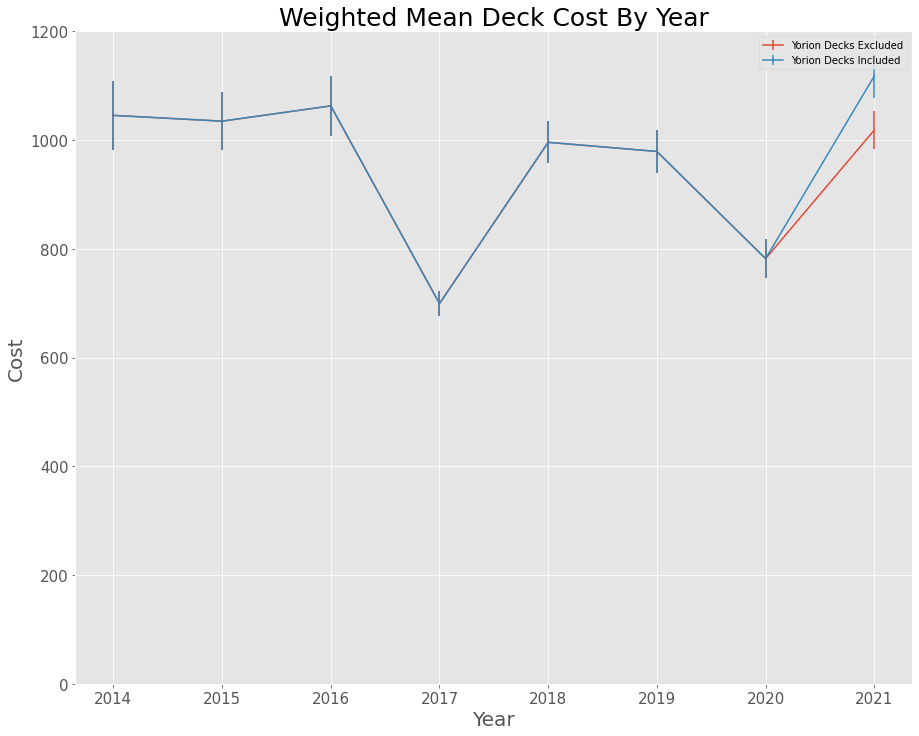

In [289]:
plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)



fig, ax = plt.subplots()
ax.errorbar(x=summarydf['Year'], y=summarydf['Weighted Mean'], yerr=summarydf['Error'])
ax.errorbar(x=summarydf['Year'], y=fullsummarydf['Weighted Mean'], yerr=fullsummarydf['Error'])
ax.set_ylim([0,1200])
ax.legend(['Yorion Decks Excluded', 'Yorion Decks Included'])
ax.set_title('Weighted Mean Deck Cost By Year', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
fig.set_size_inches([15, 12])
fig.savefig('Fulldata Line')
plt.show()

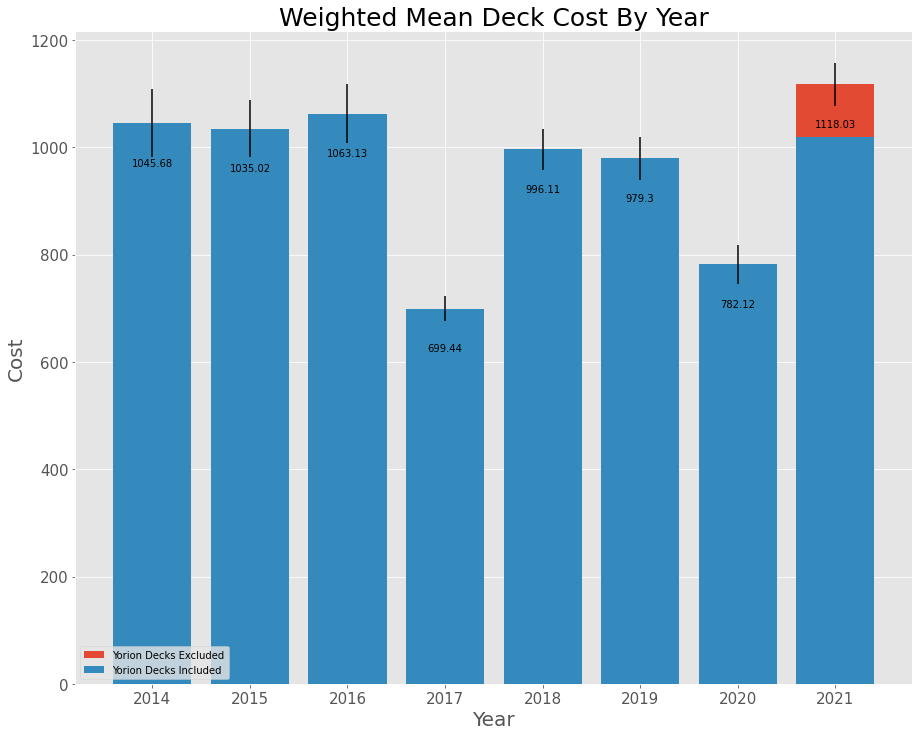

In [290]:
fig, ax = plt.subplots()
ax.bar(x=fullsummarydf['Year'], height=fullsummarydf['Weighted Mean'], yerr=fullsummarydf['Error'])
ax.bar(x=summarydf['Year'], height=summarydf['Weighted Mean'])
ax.set_title('Weighted Mean Deck Cost By Year', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.legend(['Yorion Decks Excluded', 'Yorion Decks Included'], loc='lower left')
fig.set_size_inches([15, 12])
for i, row in fullsummarydf.iterrows():
    plt.text(row['Year'],row['Weighted Mean'] - 80, round(row['Weighted Mean'], 2), ha = 'center')
fig.savefig('Fulldata Bar')
plt.show()

# Including only decks with at least 3 plays

In [276]:
df = df[df['Count'] > 3]
no_yorion = df[df['Yorion'] == 'n']
no_yorion

,Deck Name,Year,Count,Meta Share,Cost,Colors,Yorion,2021 Cost
0,Melira Pod,2014,40,10.15,1072.29,wbg,n,1258.86846
1,The Rock,2014,33,8.38,2068.59,wbg,n,2428.52466
2,Affinity,2014,31,7.87,596.70,wubrg,n,700.52580
3,Splinter Twin,2014,26,6.60,1219.45,ur,n,1431.63430
4,Mono Red Burn,2014,24,6.09,123.08,r,n,144.49592
...,...,...,...,...,...,...,...,...
758,Infect,2021,4,0.90,649.00,ubg,n,649.00000
759,Mono-Green Tron,2021,4,0.90,687.00,g,n,687.00000
760,Affinity,2021,4,0.90,374.00,wub,n,374.00000
761,Dredge,2021,4,0.90,552.00,wubr,n,552.00000


In [277]:
# Without Yorion
weighted_means = []
weighted_std = []
std_err = []
for year in df['Year'].unique():
    weighted_stats = DescrStatsW(no_yorion[no_yorion['Year'] == year]['2021 Cost'], no_yorion[no_yorion['Year'] == year]['Meta Share'], ddof=0)
    weighted_means.append(weighted_stats.mean)
    weighted_std.append(weighted_stats.std)
    std_err.append(weighted_stats.std_mean)
    
#Full Deck Data
full_weighted_means = []
full_weighted_std = []
full_std_err = []
for year in df['Year'].unique():
    weighted_stats = DescrStatsW(df[df['Year'] == year]['2021 Cost'], df[df['Year'] == year]['Meta Share'], ddof=0)
    full_weighted_means.append(weighted_stats.mean)
    full_weighted_std.append(weighted_stats.std)
    full_std_err.append(weighted_stats.std_mean)

In [281]:
#Without Yorion
summarydf = pd.DataFrame(columns = ['Year', 'Weighted Mean', 'Weighted Std', 'Error'])
summarydf['Year'] = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
summarydf['Weighted Mean'] = weighted_means
summarydf['Weighted Std'] = weighted_std
summarydf['Error'] = std_err

#With Yorion
fullsummarydf = pd.DataFrame(columns = ['Year', 'Weighted Mean', 'Weighted Std', 'Error'])
fullsummarydf['Year'] = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
fullsummarydf['Weighted Mean'] = full_weighted_means
fullsummarydf['Weighted Std'] = full_weighted_std
fullsummarydf['Error'] = full_std_err

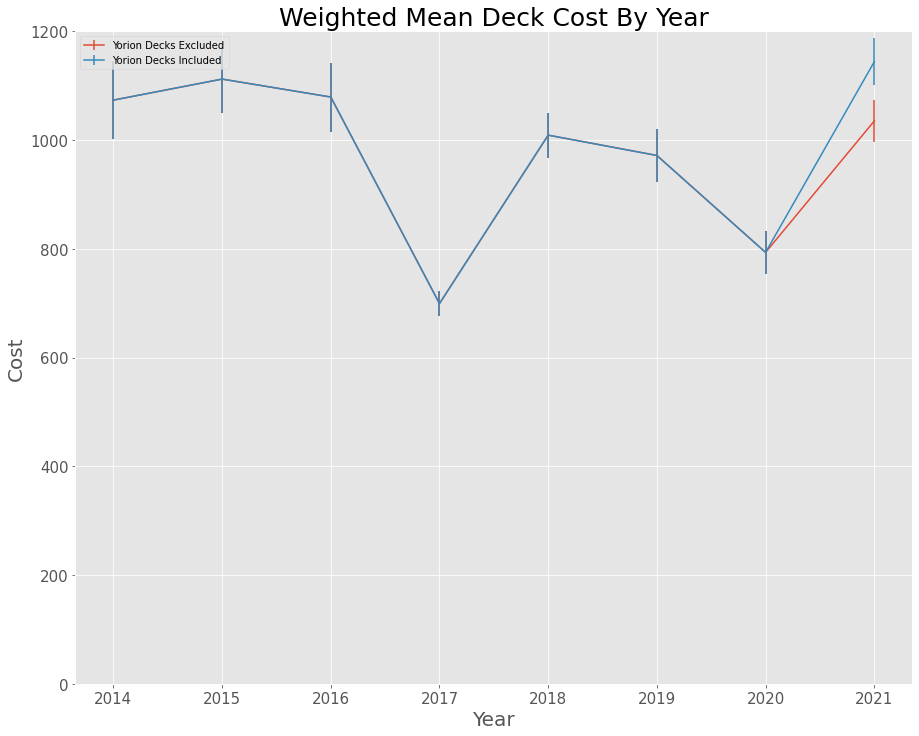

In [279]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.errorbar(x=summarydf['Year'], y=summarydf['Weighted Mean'], yerr=summarydf['Error'])
ax.errorbar(x=summarydf['Year'], y=fullsummarydf['Weighted Mean'], yerr=fullsummarydf['Error'])
ax.set_ylim([0,1200])
ax.legend(['Yorion Decks Excluded', 'Yorion Decks Included'])
ax.set_title('Weighted Mean Deck Cost By Year', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
fig.set_size_inches([15, 12])
fig.savefig('3+ Plays Line')
plt.show()

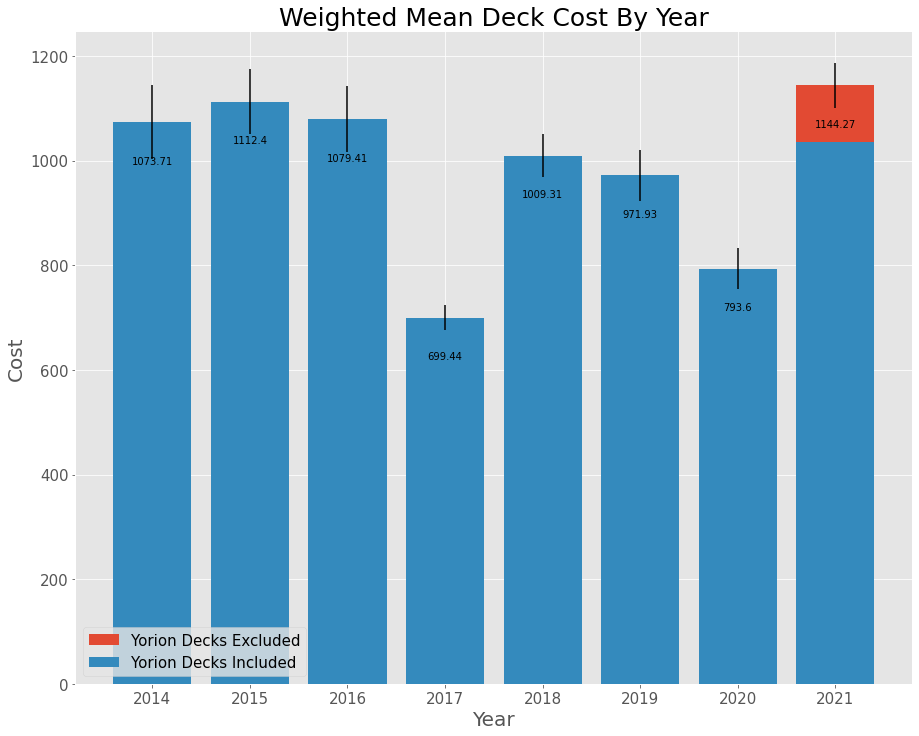

In [280]:
fig, ax = plt.subplots()
ax.bar(x=fullsummarydf['Year'], height=fullsummarydf['Weighted Mean'], yerr=fullsummarydf['Error'])
ax.bar(x=summarydf['Year'], height=summarydf['Weighted Mean'])
ax.set_title('Weighted Mean Deck Cost By Year', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.legend(['Yorion Decks Excluded', 'Yorion Decks Included'], loc='lower left', prop={'size': 15}) 
fig.set_size_inches([15, 12])
for i, row in fullsummarydf.iterrows():
    plt.text(row['Year'],row['Weighted Mean'] - 80, round(row['Weighted Mean'], 2), ha = 'center')
fig.savefig('3+ Plays Bar')
plt.show()

In [264]:
#mono Color
w = df[df['Colors'].str.contains('w')== True]
w = w['Count'].sum()

u = df[df['Colors'].str.contains('u')== True]
u = u['Count'].sum()

b = df[df['Colors'].str.contains('b')== True]
b = b['Count'].sum()

r = df[df['Colors'].str.contains('r')== True]
r = r['Count'].sum()

g = df[df['Colors'].str.contains('g')== True]
g = g['Count'].sum()

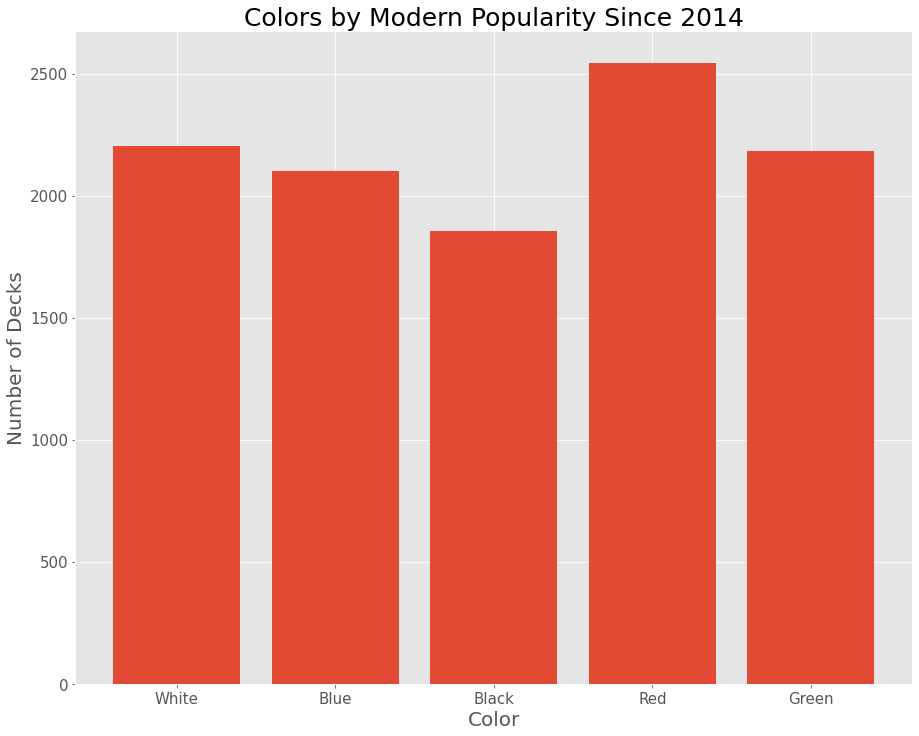

In [265]:
fig, ax = plt.subplots()
ax.bar(x=['White','Blue','Black','Red','Green'], height=[w, u, b, r, g])
ax.set_title('Colors by Modern Popularity Since 2014', fontsize=25)
ax.set_xlabel('Color', fontsize=20)
ax.set_ylabel('Number of Decks', fontsize=20)
fig.set_size_inches([15, 12])
fig.savefig('Color Bars')
plt.show()